## Machine Learning: Time Series Analysis: Weather Forecasting
### Yi Lin

In [193]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras


import altair as alt
alt.data_transformers.enable('csv')

mpl.rcParams['figure.figsize'] = (12, 8)
mpl.rcParams['axes.grid'] = False


In [194]:
df_test = pd.read_csv('/Users/Ellina/Desktop/DS552/HW/HW6/ps6_test.csv', sep=',',error_bad_lines=False,encoding='utf-8')
df_train_val = pd.read_csv('ps6_trainvalid.csv',sep=',',error_bad_lines=False,encoding='utf-8')


In [195]:
df_test

,datetime,temperature,humidity,pressure,weather,wind_direction,wind_speed
0,2017-11-20 01:00:00,295.72,26.0,1014.0,sky is clear,270.0,2.0
1,2017-11-20 02:00:00,292.97,30.0,1014.0,light rain,260.0,2.0
2,2017-11-20 03:00:00,290.71,25.0,1016.0,sky is clear,270.0,1.0
3,2017-11-20 04:00:00,290.09,72.0,1016.0,sky is clear,356.0,0.0
4,2017-11-20 05:00:00,289.03,44.0,1016.0,sky is clear,27.0,1.0
...,...,...,...,...,...,...,...
235,2017-11-29 20:00:00,293.55,24.0,1016.0,sky is clear,19.0,1.0
236,2017-11-29 21:00:00,295.68,21.0,1016.0,sky is clear,19.0,1.0
237,2017-11-29 22:00:00,295.96,23.0,1015.0,sky is clear,19.0,1.0
238,2017-11-29 23:00:00,295.65,14.0,1016.0,sky is clear,200.0,2.0


In [196]:
df_train_val

,datetime,temperature,humidity,pressure,weather,wind_direction,wind_speed
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN
1,2012-10-01 13:00:00,291.870000,88.0,1013.0,mist,0.0,0.0
2,2012-10-01 14:00:00,291.868186,88.0,1013.0,sky is clear,0.0,0.0
3,2012-10-01 15:00:00,291.862844,88.0,1013.0,sky is clear,0.0,0.0
4,2012-10-01 16:00:00,291.857503,88.0,1013.0,sky is clear,0.0,0.0
...,...,...,...,...,...,...,...
45008,2017-11-19 20:00:00,295.440000,17.0,1017.0,sky is clear,345.0,1.0
45009,2017-11-19 21:00:00,296.020000,16.0,1016.0,sky is clear,345.0,1.0
45010,2017-11-19 22:00:00,296.510000,17.0,1015.0,sky is clear,345.0,1.0
45011,2017-11-19 23:00:00,297.090000,17.0,1014.0,sky is clear,324.0,0.0


In [197]:
#check some statistics
print(df_test['weather'].value_counts())
print('=================================')
print(df_train_val['weather'].value_counts())


sky is clear               153
haze                        42
mist                        23
fog                          6
scattered clouds             5
light rain                   3
few clouds                   3
light intensity drizzle      2
dust                         2
broken clouds                1
Name: weather, dtype: int64
sky is clear                    25983
haze                             3490
mist                             2938
broken clouds                    2564
overcast clouds                  2432
scattered clouds                 2266
light rain                       1946
few clouds                       1754
fog                               560
moderate rain                     481
smoke                             203
heavy intensity rain              127
light intensity drizzle           102
dust                               64
proximity thunderstorm             25
very heavy rain                    20
thunderstorm                       17
thunderstorm wit

# 1. Expolratory Data Analysis

## 1.1 Raw Data Visualization

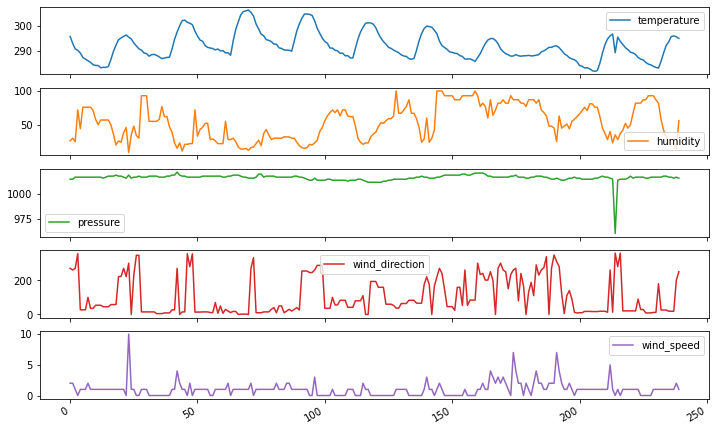

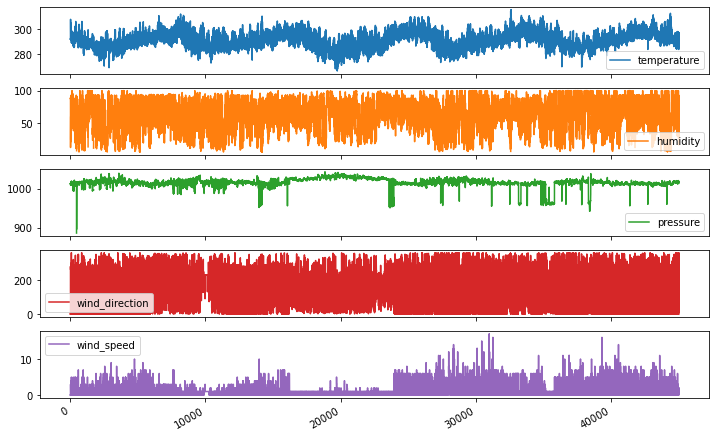

In [198]:
#titles = ['temperature','humidity', 'pressure','wind_direction','wind_speed']

plot_cols = ['temperature', 'humidity', 'pressure','wind_direction','wind_speed']
plot_features = df_test[plot_cols]
#plot_features.index = date_time
_ = plot_features.plot(subplots=True)

plot_features = df_train_val[plot_cols]
#plot_features.index = date_time[:480]
_ = plot_features.plot(subplots=True)

## 1.2 Correlation between raw numerical features

In [199]:
numeric_attribute = ['temperature', 'humidity', 'pressure','wind_direction','wind_speed']


In [200]:
#Plot correlation matrix
corr_numeric = df_train_val[numeric_attribute].corr()
corr_numeric.style.background_gradient(cmap='YlGnBu')

,temperature,humidity,pressure,wind_direction,wind_speed
temperature,1.000000,-0.370447,-0.218657,0.345760,0.298648
humidity,-0.370447,1.000000,-0.018180,-0.099902,-0.160772
pressure,-0.218657,-0.018180,1.000000,-0.088544,-0.071325
wind_direction,0.345760,-0.099902,-0.088544,1.000000,0.407088
wind_speed,0.298648,-0.160772,-0.071325,0.407088,1.000000


# 2. Data Cleaning

In [201]:
df_test.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
temperature,240.0,291.702987,5.535212,281.6,287.9075,290.57,294.9325,306.47
humidity,240.0,53.441667,25.430781,9.0,30.0000,54.00,76.0000,100.00
pressure,240.0,1015.466667,3.963079,961.0,1015.0000,1016.00,1017.0000,1021.00
wind_direction,240.0,105.004167,108.706064,0.0,17.0000,53.00,200.2500,359.00
wind_speed,240.0,1.012500,1.187386,0.0,0.0000,1.00,1.0000,10.00


In [202]:
df_train_val.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
temperature,45010.0,290.841547,6.465152,266.503667,286.37,290.53,295.08,315.47
humidity,44861.0,62.823767,21.786687,5.000000,48.00,66.00,81.00,100.00
pressure,44761.0,1015.915127,11.316175,886.000000,1013.00,1016.00,1021.00,1044.00
wind_direction,45012.0,139.733804,105.545576,0.000000,29.00,140.00,230.00,360.00
wind_speed,45012.0,1.220652,1.435687,0.000000,0.00,1.00,2.00,17.00


In [203]:
#Reference: https://github.com/walkenho/tales-of-1001-data/blob/master/timeseries-interpolation-in-spark/interpolating_time_series_p1_pandas.ipynb

#Covert the read train_val dataset to datetime formate and set them as indext of our dataframe
df_train_val['datetime'] = pd.to_datetime(df_train_val['datetime'])
df_train_val.index = df_train_val['datetime']
del df_train_val['datetime']

In [204]:
#Covert the read test dataset to datetime formate and set them as indext of our dataframe
df_test['datetime'] = pd.to_datetime(df_test['datetime'])
df_test.index = df_test['datetime']
del df_test['datetime']


In [205]:
df_train_val.head(10)

,temperature,humidity,pressure,weather,wind_direction,wind_speed
datetime,,,,,,
2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-01 13:00:00,291.870000,88.0,1013.0,mist,0.0,0.0
2012-10-01 14:00:00,291.868186,88.0,1013.0,sky is clear,0.0,0.0
2012-10-01 15:00:00,291.862844,88.0,1013.0,sky is clear,0.0,0.0
2012-10-01 16:00:00,291.857503,88.0,1013.0,sky is clear,0.0,0.0
2012-10-01 17:00:00,291.852162,88.0,1013.0,sky is clear,0.0,0.0
2012-10-01 18:00:00,291.846821,88.0,1013.0,sky is clear,0.0,0.0
2012-10-01 19:00:00,291.841480,88.0,1013.0,sky is clear,0.0,0.0
2012-10-01 20:00:00,291.836139,88.0,1013.0,sky is clear,0.0,0.0


In [206]:
df_test.head()

,temperature,humidity,pressure,weather,wind_direction,wind_speed
datetime,,,,,,
2017-11-20 01:00:00,295.72,26.0,1014.0,sky is clear,270.0,2.0
2017-11-20 02:00:00,292.97,30.0,1014.0,light rain,260.0,2.0
2017-11-20 03:00:00,290.71,25.0,1016.0,sky is clear,270.0,1.0
2017-11-20 04:00:00,290.09,72.0,1016.0,sky is clear,356.0,0.0
2017-11-20 05:00:00,289.03,44.0,1016.0,sky is clear,27.0,1.0


In [207]:
#To see the number of Missing value
Missing_values_test = df_test.isnull().sum()
print(Missing_values_test)

#Notice that train+val set has missing values
Missing_values_trainval = df_train_val.isnull().sum()
print(Missing_values_trainval)

temperature       0
humidity          0
pressure          0
weather           0
wind_direction    0
wind_speed        0
dtype: int64
temperature         3
humidity          152
pressure          252
weather             1
wind_direction      1
wind_speed          1
dtype: int64


## 2.1 Replacing missing values with backfill

In [208]:
cols = ['temperature', 'weather', 'wind_direction', 'wind_speed']
df_train_val.loc[:,cols] = df_train_val.loc[:,cols].bfill()
df_train_val

,temperature,humidity,pressure,weather,wind_direction,wind_speed
datetime,,,,,,
2012-10-01 12:00:00,291.870000,NaN,NaN,mist,0.0,0.0
2012-10-01 13:00:00,291.870000,88.0,1013.0,mist,0.0,0.0
2012-10-01 14:00:00,291.868186,88.0,1013.0,sky is clear,0.0,0.0
2012-10-01 15:00:00,291.862844,88.0,1013.0,sky is clear,0.0,0.0
2012-10-01 16:00:00,291.857503,88.0,1013.0,sky is clear,0.0,0.0
...,...,...,...,...,...,...
2017-11-19 20:00:00,295.440000,17.0,1017.0,sky is clear,345.0,1.0
2017-11-19 21:00:00,296.020000,16.0,1016.0,sky is clear,345.0,1.0
2017-11-19 22:00:00,296.510000,17.0,1015.0,sky is clear,345.0,1.0


In [209]:
values = {'humidity': 88.0, 'pressure':1013.0}
df_train_val.fillna(value=values, limit=1, inplace=True)
df_train_val

,temperature,humidity,pressure,weather,wind_direction,wind_speed
datetime,,,,,,
2012-10-01 12:00:00,291.870000,88.0,1013.0,mist,0.0,0.0
2012-10-01 13:00:00,291.870000,88.0,1013.0,mist,0.0,0.0
2012-10-01 14:00:00,291.868186,88.0,1013.0,sky is clear,0.0,0.0
2012-10-01 15:00:00,291.862844,88.0,1013.0,sky is clear,0.0,0.0
2012-10-01 16:00:00,291.857503,88.0,1013.0,sky is clear,0.0,0.0
...,...,...,...,...,...,...
2017-11-19 20:00:00,295.440000,17.0,1017.0,sky is clear,345.0,1.0
2017-11-19 21:00:00,296.020000,16.0,1016.0,sky is clear,345.0,1.0
2017-11-19 22:00:00,296.510000,17.0,1015.0,sky is clear,345.0,1.0


## 2.2 Interpolate missing values with linear

In [210]:
#Imputing using interpolation with linear methods

df_train_val['humidity'] = df_train_val['humidity'].interpolate(method='linear')
df_train_val['pressure'] = df_train_val['pressure'].interpolate(method='linear')


In [211]:
df_train_val


,temperature,humidity,pressure,weather,wind_direction,wind_speed
datetime,,,,,,
2012-10-01 12:00:00,291.870000,88.0,1013.0,mist,0.0,0.0
2012-10-01 13:00:00,291.870000,88.0,1013.0,mist,0.0,0.0
2012-10-01 14:00:00,291.868186,88.0,1013.0,sky is clear,0.0,0.0
2012-10-01 15:00:00,291.862844,88.0,1013.0,sky is clear,0.0,0.0
2012-10-01 16:00:00,291.857503,88.0,1013.0,sky is clear,0.0,0.0
...,...,...,...,...,...,...
2017-11-19 20:00:00,295.440000,17.0,1017.0,sky is clear,345.0,1.0
2017-11-19 21:00:00,296.020000,16.0,1016.0,sky is clear,345.0,1.0
2017-11-19 22:00:00,296.510000,17.0,1015.0,sky is clear,345.0,1.0


In [212]:
#Check whether there is any missing value in train_val set
Missing_values_trainval = df_train_val.isnull().sum()
print(Missing_values_trainval)


temperature       0
humidity          0
pressure          0
weather           0
wind_direction    0
wind_speed        0
dtype: int64


# 3. Feature Engineering

## 3.1 Encode by 'weather' 

In [213]:
weather1 = pd.get_dummies(df_train_val.weather, prefix='weather', drop_first=True)
#weather1.describe().transpose()


In [214]:
weather2 = pd.get_dummies(df_test.weather, prefix='weather', drop_first=True)
#weather2.describe().transpose()


#### Train_val dataset

In [215]:
frames = [df_train_val, weather1]
df_train_val = pd.concat(frames, axis=1)
df_train_val.fillna(0)
df_train_val.drop(columns=['weather'],axis=1)


,temperature,humidity,pressure,wind_direction,wind_speed,weather_drizzle,weather_dust,weather_few clouds,weather_fog,weather_haze,...,weather_scattered clouds,weather_shower rain,weather_sky is clear,weather_smoke,weather_squalls,weather_thunderstorm,weather_thunderstorm with heavy rain,weather_thunderstorm with light rain,weather_thunderstorm with rain,weather_very heavy rain
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-01 12:00:00,291.870000,88.0,1013.0,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012-10-01 13:00:00,291.870000,88.0,1013.0,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012-10-01 14:00:00,291.868186,88.0,1013.0,0.0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2012-10-01 15:00:00,291.862844,88.0,1013.0,0.0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2012-10-01 16:00:00,291.857503,88.0,1013.0,0.0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-11-19 20:00:00,295.440000,17.0,1017.0,345.0,1.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2017-11-19 21:00:00,296.020000,16.0,1016.0,345.0,1.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2017-11-19 22:00:00,296.510000,17.0,1015.0,345.0,1.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


#### Testing dataset

In [216]:
frames = [df_test, weather2]
df_test = pd.concat(frames, axis=1)
df_test.fillna(0)
df_test.drop(columns=['weather'],axis=1)

,temperature,humidity,pressure,wind_direction,wind_speed,weather_dust,weather_few clouds,weather_fog,weather_haze,weather_light intensity drizzle,weather_light rain,weather_mist,weather_scattered clouds,weather_sky is clear
datetime,,,,,,,,,,,,,,
2017-11-20 01:00:00,295.72,26.0,1014.0,270.0,2.0,0,0,0,0,0,0,0,0,1
2017-11-20 02:00:00,292.97,30.0,1014.0,260.0,2.0,0,0,0,0,0,1,0,0,0
2017-11-20 03:00:00,290.71,25.0,1016.0,270.0,1.0,0,0,0,0,0,0,0,0,1
2017-11-20 04:00:00,290.09,72.0,1016.0,356.0,0.0,0,0,0,0,0,0,0,0,1
2017-11-20 05:00:00,289.03,44.0,1016.0,27.0,1.0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-11-29 20:00:00,293.55,24.0,1016.0,19.0,1.0,0,0,0,0,0,0,0,0,1
2017-11-29 21:00:00,295.68,21.0,1016.0,19.0,1.0,0,0,0,0,0,0,0,0,1
2017-11-29 22:00:00,295.96,23.0,1015.0,19.0,1.0,0,0,0,0,0,0,0,0,1


# 3.2 Normalized Dataset

In [289]:
#Training_Val set (X: 'humidity','pressure','wind_direction','wind_speed')
cols = ['humidity','pressure','wind_direction','wind_speed']

X_train_val = df_train_val[cols]
X_train_val=X_train_val.values
X_train_val=X_train_val.reshape(-1,1)

In [217]:
#Training_Val set (Y: Temperature)
Y_train_val = df_train_val['temperature']
Y_train_val=Y_train_val.values
Y_train_val=Y_train_val.reshape(-1,1)
Y_train_val.shape


(45013, 1)

In [290]:
#Testig set (X: 'humidity','pressure','wind_direction','wind_speed')
cols = ['humidity','pressure','wind_direction','wind_speed']

X_test = df_test[cols]
X_test = X_test.values
X_test = X_test.reshape(-1,1)

In [218]:
#Testig set (Y: Temperature)
Y_test = df_test['temperature']
Y_test = Y_test.values
Y_test = Y_test.reshape(-1,1)
Y_test.shape

(240, 1)

In [285]:
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler(feature_range = (-1, 1))


sc_train = scaler.fit_transform(Y_train_val)
sc_test = scaler.transform(Y_test)

## 3.3 Data Windowing 

In [220]:
#Training_Val 
#Reference: https://www.kaggle.com/fatmakursun/time-series-forecasting-unknown-future

timestep = 24

X_set = []
Y_set = []
for i in range(len(sc_train) - (timestep)):
    X_set.append(sc_train[i:i+timestep])
    Y_set.append(sc_train[i+timestep])
    
X_set=np.array(X_set)
Y_set=np.array(Y_set)

#Training 
Xtrain=X_set
Ytrain=Y_set


In [221]:
print(Xtrain.shape)
print(Ytrain.shape)


(44989, 24, 1)
(44989, 1)


In [222]:
#Training_Val 
#Reference: https://www.kaggle.com/fatmakursun/time-series-forecasting-unknown-future

timestep = 24

X_set = []
Y_set = []
for i in range(len(sc_test) - (timestep)):
    X_set.append(sc_test[i:i+timestep])
    Y_set.append(sc_test[i+timestep])
    
X_set=np.array(X_set)
Y_set=np.array(Y_set)

#Testing 
Xtest = X_set
Ytest = Y_set


In [223]:
print(Xtest.shape)
print(Ytest.shape)

(216, 24, 1)
(216, 1)


# 4. Baseline Model 

In [286]:
Ytrain_df = pd.DataFrame(Ytrain)

In [287]:
Ytrain_baseline = Ytrain_df.shift(240)

In [288]:
from sklearn.metrics import mean_squared_error

y_pred = Ytrain_baseline[240:]
y_train_val_try = Ytrain[240:] 
mean_squared_error(y_train_val_try,y_pred,squared=True)

5.108750274760419

# 5. Weather Forecast using RNN Model

## 5.1 LSTM Model

In [177]:
from pandas import Series
from tensorflow.keras.models import Sequential
import matplotlib.patches as mpatches
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LSTM
from sklearn.metrics import mean_squared_error

In [178]:
#Reference: https://github.com/ageron/handson-ml2/blob/master/15_processing_sequences_using_rnns_and_cnns.ipynb
model = Sequential()

model.add(LSTM(32,activation = 'relu', input_shape= (24,1), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=True))
model.add(LSTM(32, activation='sigmoid', return_sequences=False))
model.add(Dense(1))


In [179]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 24, 32)            4352      
_________________________________________________________________
lstm_7 (LSTM)                (None, 24, 32)            8320      
_________________________________________________________________
lstm_8 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 21,025
Trainable params: 21,025
Non-trainable params: 0
_________________________________________________________________


#### 5.1.1 LSTM compile and fit

In [180]:
model.compile(optimizer='adam', loss='mse')


In [183]:
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='loss',mode='min')


In [184]:
history = model.fit(Xtrain,Ytrain, epochs=20, batch_size = 32, callbacks=[early_stop])


Epoch 1/20
1406/1406 [==============================] - 50s 36ms/step - loss: 0.0026
Epoch 2/20
1406/1406 [==============================] - 42s 30ms/step - loss: 0.0025
Epoch 3/20
1406/1406 [==============================] - 40s 29ms/step - loss: 0.0024
Epoch 4/20
1406/1406 [==============================] - 39s 28ms/step - loss: 0.0024
Epoch 5/20
1406/1406 [==============================] - 41s 29ms/step - loss: 0.0023
Epoch 6/20
1406/1406 [==============================] - 41s 29ms/step - loss: 0.0023
Epoch 7/20
1406/1406 [==============================] - 40s 29ms/step - loss: 0.0023
Epoch 8/20
1406/1406 [==============================] - 41s 29ms/step - loss: 0.0022
Epoch 9/20
1406/1406 [==============================] - 42s 30ms/step - loss: 0.0022
Epoch 10/20
1406/1406 [==============================] - 41s 29ms/step - loss: 0.0021
Epoch 11/20
1406/1406 [==============================] - 43s 31ms/step - loss: 0.0021
Epoch 12/20
1406/1406 [==============================] - 43s 31

#### 5.1.2 LSTM Model Loss

Text(0.5, 1.0, 'Model Accuracy')

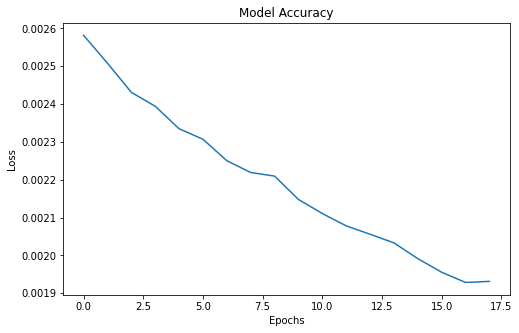

In [185]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Model Loss")

#### 5.1.3 LSTM >> MSE

In [186]:
preds= model.predict(Xtest)
preds = scaler.inverse_transform(preds)


Ytest=np.asanyarray(Ytest)  
Ytest=Ytest.reshape(-1,1) 
Ytest = scaler.inverse_transform(Ytest)


Ytrain=np.asanyarray(Ytrain)  
Ytrain=Ytrain.reshape(-1,1) 
Ytrain = scaler.inverse_transform(Ytrain)

mean_squared_error(Ytest,preds)

2.3662022009801915

#### 5.1.4 LSTM with testing set 

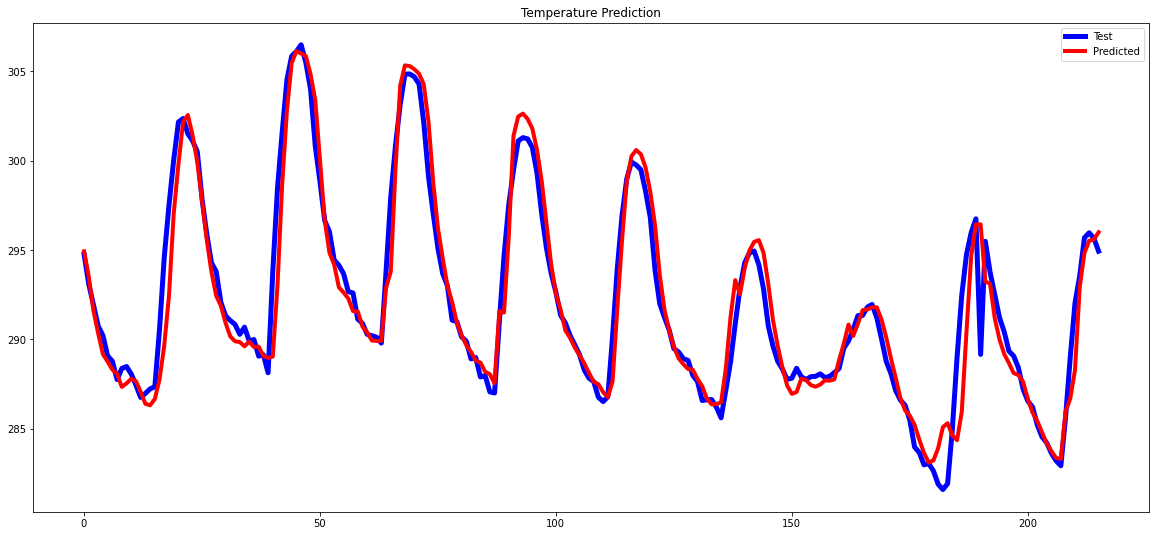

In [187]:
plt.figure(figsize=(20,9))
plt.plot(Ytest , 'blue', linewidth=5)
plt.plot(preds,'r' , linewidth=4)
plt.legend(('Test','Predicted'))
plt.title("Temperature Prediction")
plt.show()

##  5.2 GRU

In [242]:
#Reference: https://github.com/ageron/handson-ml2/blob/master/15_processing_sequences_using_rnns_and_cnns.ipynb
from tensorflow.keras.layers import GRU

model = Sequential()

model.add(GRU(32,activation = 'relu', input_shape= (24,1), return_sequences=True))
model.add(GRU(32, activation='relu', return_sequences=True))
model.add(GRU(32, activation='sigmoid', return_sequences=False))
model.add(Dense(1))


In [243]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_6 (GRU)                  (None, 24, 32)            3360      
_________________________________________________________________
gru_7 (GRU)                  (None, 24, 32)            6336      
_________________________________________________________________
gru_8 (GRU)                  (None, 32)                6336      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 33        
Total params: 16,065
Trainable params: 16,065
Non-trainable params: 0
_________________________________________________________________


#### 5.2.1 GRU compile and fit

In [244]:
model.compile(optimizer='adam', loss='mse')


In [245]:
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='loss',mode='min')

In [246]:
history = model.fit(Xtrain,Ytrain, epochs=20, batch_size = 32, callbacks=[early_stop])

Epoch 1/20
1406/1406 [==============================] - 75s 49ms/step - loss: 0.0269
Epoch 2/20
1406/1406 [==============================] - 65s 46ms/step - loss: 0.0027
Epoch 3/20
1406/1406 [==============================] - 58s 41ms/step - loss: 0.0025
Epoch 4/20
1406/1406 [==============================] - 59s 42ms/step - loss: 0.0024
Epoch 5/20
1406/1406 [==============================] - 57s 41ms/step - loss: 0.0023
Epoch 6/20
1406/1406 [==============================] - 59s 42ms/step - loss: 0.0024
Epoch 7/20
1406/1406 [==============================] - 78s 56ms/step - loss: 0.0024
Epoch 8/20
1406/1406 [==============================] - 75s 53ms/step - loss: 0.0022
Epoch 9/20
1406/1406 [==============================] - 68s 49ms/step - loss: 0.0022
Epoch 10/20
1406/1406 [==============================] - 65s 47ms/step - loss: 0.0021
Epoch 11/20
1406/1406 [==============================] - 71s 51ms/step - loss: 0.0021
Epoch 12/20
1406/1406 [==============================] - 60s 43

#### 5.2.2 GRU Model Loss

Text(0.5, 1.0, 'Model Accuracy')

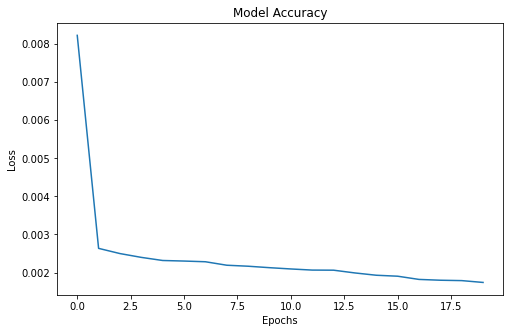

In [248]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Model Loss")

#### 5.2.3 GRU MSE

In [249]:
preds= model.predict(Xtest)
preds = scaler.inverse_transform(preds)


Ytest=np.asanyarray(Ytest)  
Ytest=Ytest.reshape(-1,1) 
Ytest = scaler.inverse_transform(Ytest)


Ytrain=np.asanyarray(Ytrain)  
Ytrain=Ytrain.reshape(-1,1) 
Ytrain = scaler.inverse_transform(Ytrain)

mean_squared_error(Ytest,preds)

1.9175796396495615

#### 5.2.4 GRU with testing set

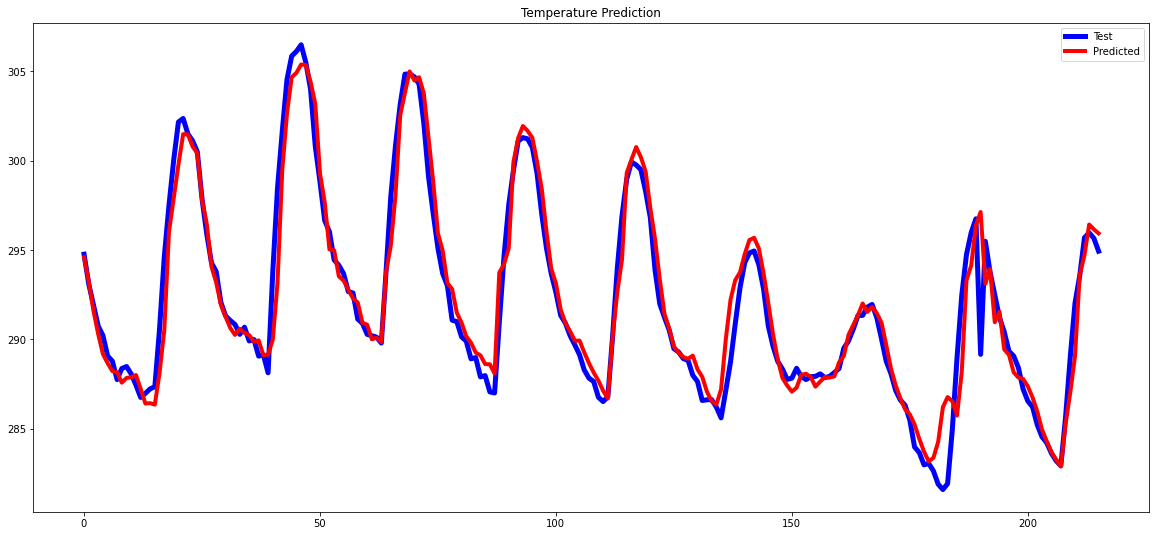

In [250]:
plt.figure(figsize=(20,9))
plt.plot(Ytest , 'blue', linewidth=5)
plt.plot(preds,'r' , linewidth=4)
plt.legend(('Test','Predicted'))
plt.title("Temperature Prediction")
plt.show()